<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/Actividad_Semanal_7_Regresiones_Kmeans_A01793812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 7 Regresiones y K means**

### **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Ciencia y Analítica de DAtos**
### **Tecnológico de Monterrey**
### **Prof María de la Paz Rico Fernández**

### **Nombre del estudiante: Alejandro García Hernández**

### **Matrícula: A01793812**

# **Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

In [5]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 44.5 MB/s 
     |████████████████████████████████| 1.0 MB 49.1 MB/s 
     |████████████████████████████████| 1.7 MB 58.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 65.6 MB/s 
     |████████████████████████████████| 6.3 MB 50.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=766531fb02d30b77e9b8fba22ee0e4d1c24d3c543040c6beb7d1f9f525ecb6e7
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=797e1582d7dd7502967ceb118f2cbdf862614b4b5aa4a1ed5ac81169335a7d88
  Stored in directory: /root/

In [6]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import geopandas as gpd

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, davies_bouldin_score, silhouette_score, silhouette_samples

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

from shapely.geometry import Point

%matplotlib inline

import qeds
qeds.themes.mpl_style();

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

Para realizar el análisis que se pide se utilizará un modelo supervisado, ya que desde un inicio contamos con datos observados de la variable objetivo, además, la base tiene solo dos variables, una de ellas la variable objetivo, por lo que el análisis que se escogerá un modelo de regresión simple.

In [7]:
#Descargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


Observamos que ninguna de las dos variables contiene valores faltantes y ambas varibales son continuas.

In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


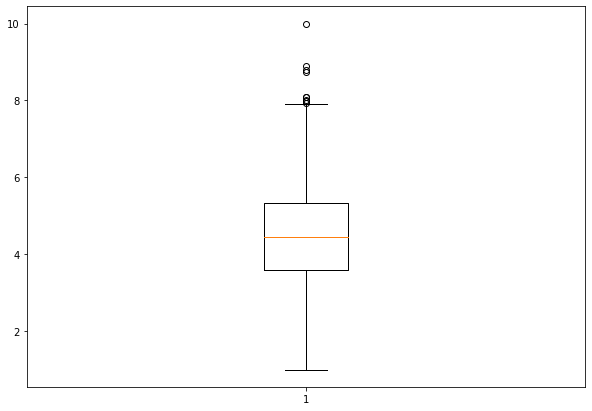

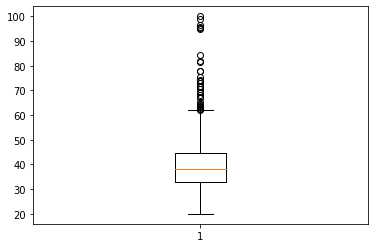

In [ ]:
#Se generan boxplot
plt.figure(figsize =(10, 7))
  
plt.boxplot(df['Number of Units'])
plt.show()

plt.boxplot(df['Manufacturing Cost'])
plt.show()

De primera vista parece que hay valores atípicos en ambas variables, sin embargo al no tener mayor información sobre la naturaleza de los datos no se eliminarán.

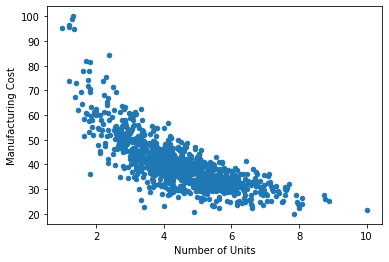

In [ ]:
#Se realiza una gráfica de dispersión para ver la relación que guardan los datos
datos=df[['Number of Units',"Manufacturing Cost"]]

#Observamos una primer distribución de los datos
datos.plot.scatter( 'Number of Units',"Manufacturing Cost")


De manera visual, podemos darnos cuenta que aunque con una regresión líneal podremos capturar una buena cantidad de información, parece que una polinomial será lo más adecuado.

In [10]:
#Se definen los conjuntos con las variables de entrada y salida
X = df[['Number of Units']]
y = df['Manufacturing Cost']

- Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [11]:
#se vididen los datos dejando 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

- Regresión Lineal.
 - Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [12]:
#Se genera el objeto para la regresión y se entrena el modelo
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

Se obtuvo la siguiente ecuación: Y =  -5.9791 *X+ 66.8
El error (rmse) es: 6.822
El mae es: 4.886
La R2 es: 0.574


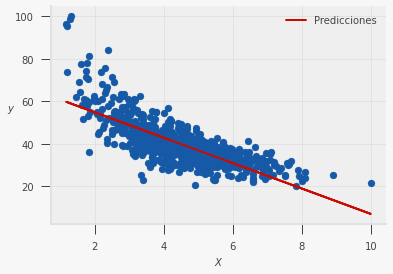

In [13]:

#Se imprimen los coeficientes obtenidos
print("Se obtuvo la siguiente ecuación: Y = ", round(lr.coef_[0],4),"*X+", round(lr.intercept_,4))


#Se obtienen las predicciones con los conjuntos de entrenamiento y prueba
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse = mean_squared_error(y_train, y_train_hat,squared=False)
mae = mean_absolute_error(y_train, y_train_hat)
r2 = r2_score(y_train, y_train_hat)

print(f"El error (rmse) es: {round(rmse,3)}")
print(f"El mae es: {round(mae,3)}")
print(f"La R2 es: {round(r2,3)}")

El error (rmse) es: 7.068
El mae es: 5.033
La R2 es: 0.596


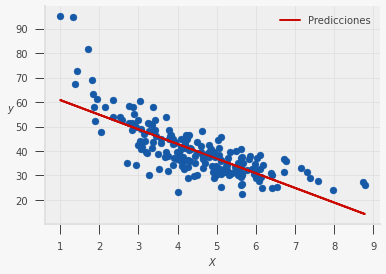

In [14]:
#ahora veamos como se comporta el modelo con el conjunto de prueba

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse_lr = mean_squared_error(y_test, y_test_hat,squared=False)
r2_lr = r2_score(y_test, y_test_hat)
mae_lr = mean_absolute_error(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_lr,3)}")
print(f"El mae es: {round(mae_lr,3)}")
print(f"La R2 es: {round(r2_lr,3)}")

In [15]:
#LA siguiente función ayuda a graficar la distribución de las predicciones para el conjunto de entrenamiento y prueba para ver como se desempeñan 
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')

    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


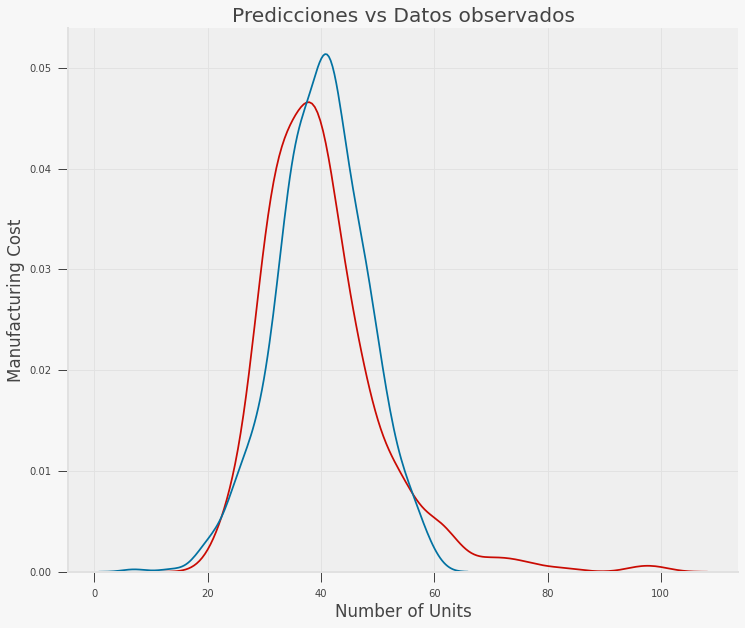

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


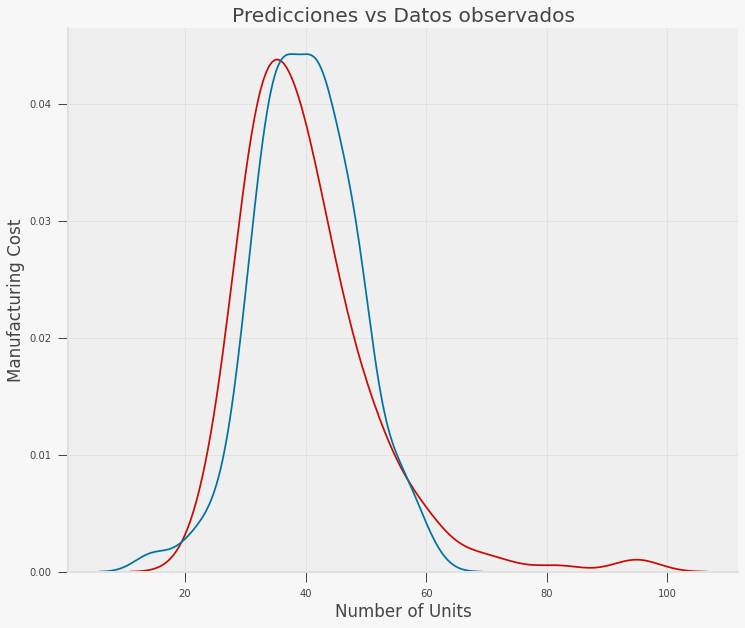

In [16]:
#graficamos para comparar los comportamientos
Title = 'Predicciones vs Datos observados'

DistributionPlot(y_train, y_train_hat, "Observados (Train)", "Predicciones (Train)", Title)
DistributionPlot(y_test,y_test_hat,"Observadoss (Test)","Predicciones (Test)",Title)

Observamos que ambos conjuntos muestran resultados similares.

- Regresión Polinomial.
 - Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [17]:
#Primero se busca el orden que máximice el valor de la R2

#Generamos un pipeline para transformar los datos a un polinomio y hacer la regresión
modelo = make_pipeline(PolynomialFeatures(), LinearRegression())

#Se definen cuales valores se quieren evaluar para el grado
grado = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8]}

#Se corre el grid y se entrena, para el cross-validation se partirá el conjunto en 5
gscv = GridSearchCV(modelo, grado, cv = 5, scoring='r2')
gscv.fit(X_train, y_train)

gscv.best_params_

{'polynomialfeatures__degree': 4}

In [26]:
#Se imprimen los coeficientes obtenidos
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_pr, y_train)

print("Se obtuvo la siguiente ecuación: Y = ", round(lr.coef_[1],4),"*X+", round(lr.coef_[2],4),"*X^2+",round(lr.coef_[3],4),"*X^3+",round(lr.coef_[4],4),"*X^4+",round(lr.intercept_,4))

Se obtuvo la siguiente ecuación: Y =  -52.5423 *X+ 11.6873 *X^2+ -1.2248 *X^3+ 0.0476 *X^4+ 129.7913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


El error (rmse) es: 5.944
El mae es: 4.465
La R2 es: 0.677


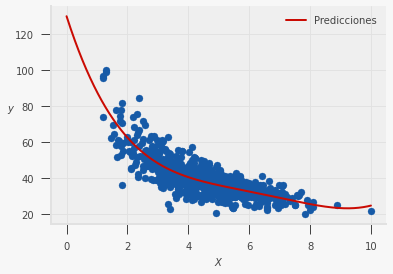

In [31]:
#Se obtienen las predicciones con los conjuntos de entrenamiento y prueba
X_fit = np.linspace(0, 10, 800)

y_hat = gscv.predict(X_fit[:, np.newaxis])
y_train_pr_hat = gscv.predict(X_train)
y_test_pr_hat = gscv.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse = mean_squared_error(y_train, y_train_pr_hat,squared=False)
mae = mean_absolute_error(y_train, y_train_pr_hat)
r2 = r2_score(y_train, y_train_pr_hat)

print(f"El error (rmse) es: {round(rmse,3)}")
print(f"El mae es: {round(mae,3)}")
print(f"La R2 es: {round(r2,3)}")

El error (rmse) es: 5.55
El mae es: 4.352
La R2 es: 0.751


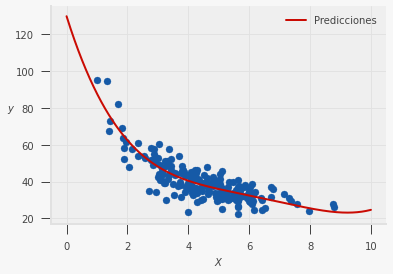

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse_pr = mean_squared_error(y_test, y_test_pr_hat,squared=False)
mae_pr = mean_absolute_error(y_test, y_test_pr_hat)
r2_pr = r2_score(y_test, y_test_pr_hat)

print(f"El error (rmse) es: {round(rmse_pr,3)}")
print(f"El mae es: {round(mae_pr,3)}")
print(f"La R2 es: {round(r2_pr,3)}")

Observamos nuevamente que tanto el rmse como el valor de R2 entre el conjunto de entrenamiento y prueba es similar.

- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [34]:
#Al igual que con la regresión polinomial, ahora intentamos buscar el mejor valor de alpha para la regresión Ridge

#Primero ajustamos nuestros datos a un polinomio de cuarto grado
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)

#definimos el objeto para la regresión
RR=Ridge()

#definimos un diccionario con los parámetros y sus valores que queremos evaluar

parametros1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# definimos la búsqueda la cuál se realizará partiendo el conjunto que se ingrese en 5 partes iguales. 
Grid1 = GridSearchCV(RR, parametros1,cv=5)

#buscamos los valores
Grid1.fit(X_train_pr, y_train)

#y finalmente observamos el resultado
Grid1.best_estimator_

Ridge(alpha=0.1)

In [35]:
#Se imprimen los coeficientes obtenidos
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
RR=Ridge(alpha=0.1)
RR.fit(X_train_pr, y_train)

print("Se obtuvo la siguiente ecuación: Y = ", round(RR.coef_[1],4),"*X+", round(RR.coef_[2],4),"*X^2+",round(RR.coef_[3],4),"*X^3+",round(RR.coef_[4],4),"*X^4+",round(RR.intercept_,4))

Se obtuvo la siguiente ecuación: Y =  -47.0964 *X+ 9.9212 *X^2+ -0.9911 *X^3+ 0.0369 *X^4+ 124.111


El error (rmse) es: 5.947
El mae es: 4.462
La R2 es: 0.676


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


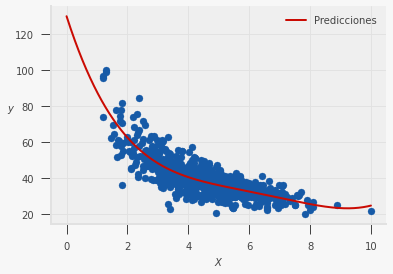

In [36]:
#Se obtienen las predicciones para los conjuntos de entrenamiento y prueba
X_fit = np.linspace(0, 10, 800)

y_hat = gscv.predict(X_fit[:, np.newaxis])
y_train_ridge_hat = Grid1.predict(X_train_pr)
y_test_ridge_hat = Grid1.predict(X_test_pr)

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse = mean_squared_error(y_train, y_train_ridge_hat,squared=False)
mae = mean_absolute_error(y_train, y_train_ridge_hat)
r2 = r2_score(y_train, y_train_ridge_hat)

print(f"El error (rmse) es: {round(rmse,3)}")
print(f"El mae es: {round(mae,3)}")
print(f"La R2 es: {round(r2,3)}")

El error (rmse) es: 5.565
El mae es: 4.34
La R2 es: 0.749


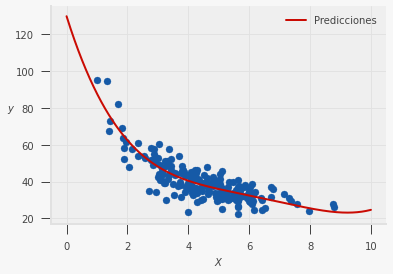

In [37]:
#Ahora para el conjunto de prueba

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse_ridge = mean_squared_error(y_test, y_test_ridge_hat,squared=False)
mae_ridge = mean_absolute_error(y_test, y_test_ridge_hat)
r2_ridge = r2_score(y_test, y_test_ridge_hat)

print(f"El error (rmse) es: {round(rmse_ridge,3)}")
print(f"El mae es: {round(mae_ridge,3)}")
print(f"La R2 es: {round(r2_ridge,3)}")

In [39]:
#definimos el objeto para la regresión
RL=Lasso(max_iter=10000000)

#definimos un diccionario con los parámetros y sus valores que queremos evaluar

parametros2= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# definimos la búsqueda la cuál se realizará partiendo el conjunto que se ingrese en 5 partes iguales. 
Grid2 = GridSearchCV(RL, parametros2,cv=5)

#buscamos los valores
Grid2.fit(X_train_pr, y_train)

#y finalmente observamos el resultado
Grid2.best_estimator_

Lasso(alpha=0.001, max_iter=10000000)

In [40]:
#Se imprimen los coeficientes obtenidos
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
RL=Ridge(alpha=0.001, max_iter=10000000)
RL.fit(X_train_pr, y_train)

print("Se obtuvo la siguiente ecuación: Y = ", round(RL.coef_[1],4),"*X+", round(RL.coef_[2],4),"*X^2+",round(RL.coef_[3],4),"*X^3+",round(RL.coef_[4],4),"*X^4+",round(RL.intercept_,4))

Se obtuvo la siguiente ecuación: Y =  -52.4814 *X+ 11.6676 *X^2+ -1.2222 *X^3+ 0.0475 *X^4+ 129.7278


El error (rmse) es: 5.945
El mae es: 4.465
La R2 es: 0.677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


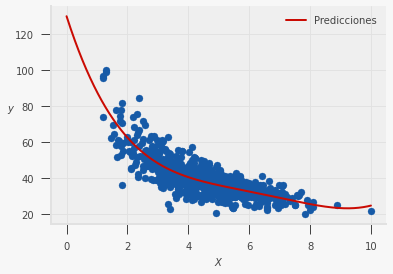

In [41]:
#Se obtienen las predicciones para los conjuntos de entrenamiento y prueba
X_fit = np.linspace(0, 10, 800)

y_hat = gscv.predict(X_fit[:, np.newaxis])
y_train_lasso_hat = Grid2.predict(X_train_pr)
y_test_lasso_hat = Grid2.predict(X_test_pr)

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse = mean_squared_error(y_train, y_train_lasso_hat,squared=False)
mae = mean_absolute_error(y_train, y_train_lasso_hat)
r2 = r2_score(y_train, y_train_lasso_hat)

print(f"El error (rmse) es: {round(rmse,3)}")
print(f"El mae es: {round(mae,3)}")
print(f"La R2 es: {round(r2,3)}")

El error (rmse) es: 5.553
El mae es: 4.35
La R2 es: 0.751


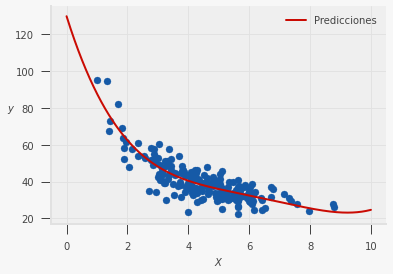

In [42]:
#Ahora para el conjunto de prueba

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_hat, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=10);

rmse_lasso = mean_squared_error(y_test, y_test_lasso_hat,squared=False)
mae_lasso = mean_absolute_error(y_test, y_test_lasso_hat)
r2_lasso = r2_score(y_test, y_test_lasso_hat)

print(f"El error (rmse) es: {round(rmse_lasso,3)}")
print(f"El mae es: {round(mae_lasso,3)}")
print(f"La R2 es: {round(r2_lasso,3)}")

- Finalmente grafica :
 - MAE (de los cuatro métodos)
 - R2 (de los cuatro métodos)

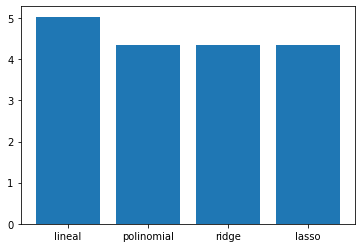

In [ ]:
#Graficamos el valor MAE para los distintos modelos

valores = [mae_lr, mae_pr, mae_ridge, mae_lasso]
nombres = ('lineal','polinomial','ridge','lasso')
y_pos = np.arange(len(nombres))

plt.bar(y_pos, valores)
plt.xticks(y_pos, nombres)

plt.show()

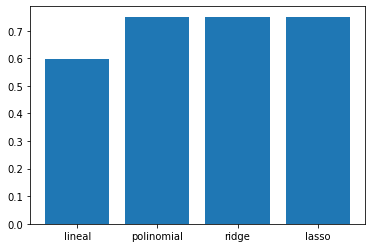

In [ ]:
#Graficamos el valor R2 para los distintos modelos

valores = [r2_lr, r2_pr, r2_ridge, r2_lasso]
nombres = ('lineal','polinomial','ridge','lasso')
y_pos = np.arange(len(nombres))

plt.bar(y_pos, valores)
plt.xticks(y_pos, nombres)

plt.show()

- Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

- Si comparamos los valores de la R2 así como del MAE para la regresión lineal y la polinomial de grado 4 se observa que en ambos indicadores la regresión polinomial obtiene mejores métricas. Además, dado que los mejores parámetros encontrados de alpha para Ridge y Lasso son muy pequeños, nos hace ver que el modelo prácticamente no es penalizado, por lo que el modelo no tiene sobreajuste. Por lo anterior, **la regresión polinomial es la más adecuada**.
- Utilicé 80% de los datos para entrenamiento y el 20% restante para la evaluación de los modelos, con estos datos y el modelo descrito en el primer punto, el error que se obtuvo es bueno, ya que es relativamente pequeño, además el valor de R2 indica que con la variable independiente logramos explicar el alrededor del 75% de la variabilidad de la variable objetivo. 



# **Ejercicio 2. Regresión múltiple.**

Encuentra el mejor regresor para los datos de las casas:

- Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [ ]:
#Obtenemos los datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')


In [ ]:
#Se eliminan las variables que no se usarán y se crean los conjuntos X y Y

df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
#observamos que nuestras variables independientes no contienen valores nulos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 2.5 MB


In [ ]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


Se observa que las variables tienen diferentes escalas por lo que es conveniente normalizarlas

In [ ]:
#Se escalan los datos que usaremos
nombres = X.columns
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)
X_escalado = pd.DataFrame(X_escalado, columns=nombres)

#y observamos que ya todos tienen media 0 y desviación 1.
X_escalado.describe().round(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.624,-2.746,-1.949,-0.352,-0.915,-0.087,-0.306,-3.703,-5.663,-1.809,-0.659,-2.417,-0.210,-2.316,-0.444
25%,-0.399,-0.474,-0.711,-0.243,-0.915,-0.087,-0.306,-0.629,-0.559,-0.723,-0.659,-0.681,-0.210,-0.724,-0.281
50%,-0.399,0.176,-0.185,-0.181,0.011,-0.087,-0.306,-0.629,-0.559,-0.276,-0.659,0.136,-0.210,-0.214,-0.189
75%,0.676,0.500,0.512,-0.107,0.937,-0.087,-0.306,0.908,0.292,0.509,0.607,0.885,-0.210,0.545,-0.098
max,31.858,7.642,12.478,39.504,3.714,11.471,4.914,2.444,4.546,9.204,10.232,1.498,4.806,6.162,31.440


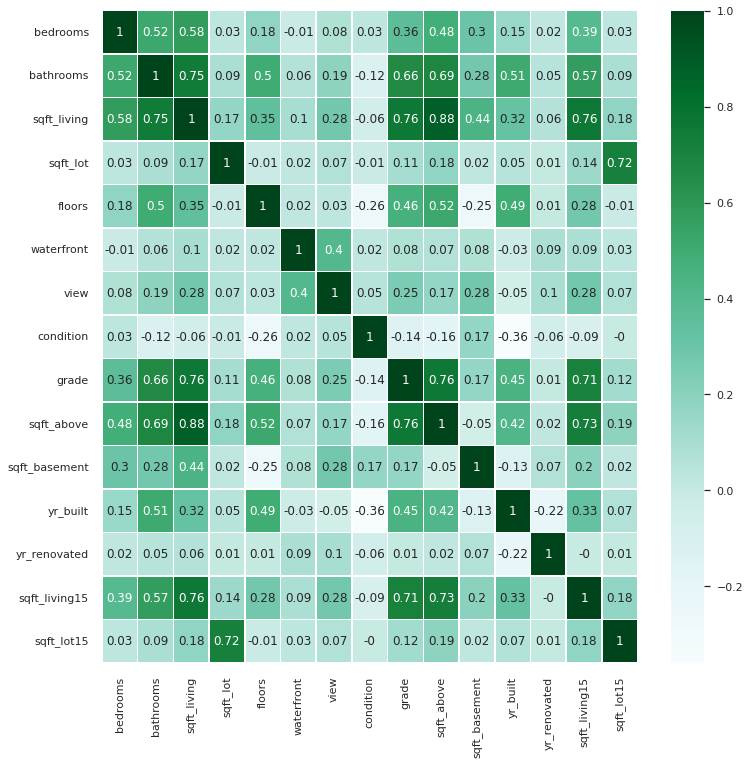

In [ ]:
#Creamos un heatmap para conocer si existen variables correlacionadas

sns.set(rc={'figure.figsize':(12,12)}) 
sns.heatmap(round(X_escalado.corr(),2), annot = True, cmap= 'BuGn', linewidths= 0.5)
plt.show()

Se observa que algunas variables tienen una correlación fuerte, entonces se realiza PCA con la intención de reducir la dimencionalidad de la base

In [ ]:
# se obtienen 5 componentes principales
pca = PCA(n_components=10) 
X_2 = pca.fit_transform(X_escalado) 

componentes = pca.explained_variance_ratio_

x=0
for i in componentes:
  print("El porcentaje de variación explicada por PC",x," es:",round(i*100,3))
  x=x+1

El porcentaje de variación explicada por PC 0  es: 33.292
El porcentaje de variación explicada por PC 1  es: 13.087
El porcentaje de variación explicada por PC 2  es: 11.161
El porcentaje de variación explicada por PC 3  es: 8.615
El porcentaje de variación explicada por PC 4  es: 6.851
El porcentaje de variación explicada por PC 5  es: 5.625
El porcentaje de variación explicada por PC 6  es: 4.572
El porcentaje de variación explicada por PC 7  es: 4.041
El porcentaje de variación explicada por PC 8  es: 3.512
El porcentaje de variación explicada por PC 9  es: 2.672


Se observa que las primeras 3 componentes son las más relevantes pero no capturan un porcentaje importante de la varianza original, veamos que variables son las más relevantes en estos componentes.

In [ ]:
#Se obtienen las 12 variables más importantes para cada una de las primeras 3 componentes
nombres = X_escalado.columns
for i in (0,1,2,3,4,5):
  df_pc = pd.DataFrame(pca.components_[i],nombres,columns=["val"])
  print(df_pc.sort_values('val',ascending=False).head(12))

                    val
sqft_living    0.412951
sqft_above     0.401875
grade          0.384202
bathrooms      0.379309
sqft_living15  0.362763
bedrooms       0.258233
floors         0.247439
yr_built       0.241176
view           0.133326
sqft_basement  0.105026
sqft_lot15     0.100882
sqft_lot       0.095231
                    val
sqft_basement  0.481239
view           0.364838
condition      0.357360
waterfront     0.239410
yr_renovated   0.177229
sqft_lot15     0.171669
sqft_lot       0.169965
sqft_living    0.155088
bedrooms       0.131897
sqft_living15  0.080997
bathrooms     -0.024393
grade         -0.027832
                    val
sqft_lot       0.665632
sqft_lot15     0.665623
yr_built       0.063371
sqft_above     0.041207
sqft_living15 -0.003674
floors        -0.023144
grade         -0.040670
waterfront    -0.050552
yr_renovated  -0.057561
sqft_living   -0.064634
view          -0.074724
condition     -0.075266
                    val
waterfront     0.623061
view           0

Aunque es posible reducir la dimensionalidad de los datos, por ahora se realizará el análisis con el conjunto completo de información ya que las primeras componentes no capturan suficiente información, y las variables más relevantes en cada una de ellas no dan una idea clara de la interpretación de las componentes.

In [ ]:
#se vididen los datos dejando 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

- Regresión Múltiple Lineal.
 - Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
#Se genera un Pipeline para escalar los datos entrenar el modelo

mlr_pipe = Pipeline([('normalizar',StandardScaler()),('modelo',LinearRegression())])
mlr_pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizar', StandardScaler()),
                ('modelo', LinearRegression())])

In [ ]:
# Obtenemos la ecuación
ecuacion = "Y ="
for i in range(0,14):
  ecuacion = ecuacion + "+" + str(round(mlr_pipe.named_steps['modelo'].coef_[0][i],3)) + "*X"+str(i+1)
ecuacion

'Y =+-34775.723*X1+30948.075*X2+75504.049*X3+1099.371*X4+15945.54*X5+48767.949*X6+32809.652*X7+14365.729*X8+142095.57*X9+63379.591*X10+37914.583*X11+-103809.021*X12+4235.402*X13+17735.23*X14'

In [ ]:
#Se obtienen las predicciones en el conjunto de prueba
y_test_hat = mlr_pipe.predict(X_test)

rmse_mlr = mean_squared_error(y_test, y_test_hat,squared=False)
mae_mlr = mean_absolute_error(y_test, y_test_hat)
r2_mlr = r2_score(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_mlr,3)}")
print(f"El mae es: {round(mae_mlr,3)}")
print(f"La R2 es: {round(r2_mlr,3)}")

El error (rmse) es: 213832.575
El mae es: 136332.194
La R2 es: 0.665


- Regresión Múltiple Polinomial.
 - Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
#Primero se busca el orden que máximice el valor de la R2

#Generamos un pipeline para transformar los datos a un polinomio y hacer la regresión
modelo = make_pipeline(StandardScaler(),PolynomialFeatures(), LinearRegression())

#Se definen cuales valores se quieren evaluar para el grado
grado = {'polynomialfeatures__degree': [1, 2, 3, 4]}

#Se corre el grid y se entrena, para el cross-validation se partirá el conjunto en 5
gscv = GridSearchCV(modelo, grado, cv = 5, scoring='r2')
gscv.fit(X_train, y_train)

gscv.best_params_

{'polynomialfeatures__degree': 2}

In [ ]:
#Se imprimen los coeficientes obtenidos
mpr_pipe = Pipeline([('normalizar',StandardScaler()),('poly',PolynomialFeatures(degree=2)),('modelo',LinearRegression())])
mpr_pipe.fit(X_train, y_train)
mpr_pipe.named_steps['modelo'].coef_

#Dada la cantidad de variables y el grado del polinomio, para fines prácticas únicamente se muestran los coeficientes de cada una de las variables.

array([[-7.03620126e+11, -7.49544540e+03,  2.41516744e+04,
        -6.80359886e+14, -3.21089471e+03, -6.38228657e+03,
        -3.13069712e+15,  2.83697670e+02,  2.55235109e+04,
         1.21597132e+05,  6.13169894e+14,  3.29885431e+14,
        -7.11022339e+04, -7.87698848e+05,  4.19691021e+04,
        -3.29560288e+04,  7.40822156e+02,  5.37114218e+03,
         1.13453713e+15, -1.06846722e+03,  4.54543800e+03,
        -2.17852007e+02, -3.05550554e+03, -2.81353291e+03,
        -5.28514951e+03, -1.02249416e+15, -5.50101907e+14,
        -1.41454843e+04, -4.59486474e+03,  1.26453477e+04,
         5.33743423e+03, -5.16202826e+03,  5.59909982e+14,
        -4.65937500e+03, -1.10306406e+04,  1.61832178e+03,
         3.96603125e+03, -1.30612500e+03,  1.82950625e+04,
        -5.04615206e+14, -2.71483004e+14,  1.26442500e+04,
        -5.67783594e+03, -1.05921250e+04, -1.16125000e+03,
        -2.38040246e+14,  4.18076474e+12, -4.15032639e+14,
        -1.62822332e+14, -9.57032329e+14, -3.74095807e+1

In [ ]:
#Se obtienen las predicciones en el conjunto de prueba
y_test_hat = mpr_pipe.predict(X_test)

rmse_mpr = mean_squared_error(y_test, y_test_hat,squared=False)
mae_mpr = mean_absolute_error(y_test, y_test_hat)
r2_mpr = r2_score(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_mpr,3)}")
print(f"El mae es: {round(mae_mpr,3)}")
print(f"La R2 es: {round(r2_mpr,3)}")

El error (rmse) es: 181466.071
El mae es: 122004.625
La R2 es: 0.759


- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo,  errores y r cuadrada.

In [ ]:
#Al igual que con la regresión polinomial, ahora intentamos buscar el mejor valor de alpha para la regresión Ridge

#Se escalan los datos que usaremos
nombres = X.columns
scaler = StandardScaler()
X_escalado2 = scaler.fit_transform(X_train)
X_escalado2 = pd.DataFrame(X_escalado2, columns=nombres)

#ajustamos nuestros datos a un polinomio de cuarto grado
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_escalado2)

#definimos el objeto para la regresión
RR=Ridge()

#definimos un diccionario con los parámetros y sus valores que queremos evaluar

parametros1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# definimos la búsqueda la cuál se realizará partiendo el conjunto que se ingrese en 5 partes iguales. 
Grid1 = GridSearchCV(RR, parametros1,cv=5)

#buscamos los valores
Grid1.fit(X_train_pr, y_train)

#y finalmente observamos el resultado
Grid1.best_estimator_

Ridge(alpha=1000)

In [ ]:
#Se imprimen los coeficientes obtenidos
ridge_pipe = Pipeline([('normalizar',StandardScaler()),('poly',PolynomialFeatures(degree=2)),('modelo',Ridge(alpha=1000))])
ridge_pipe.fit(X_train, y_train)
ridge_pipe.named_steps['modelo'].coef_


array([[ 0.00000000e+00, -3.40345936e+03,  2.24987656e+04,
         5.01613399e+04, -8.05205796e+03, -2.50414219e+03,
         3.29223193e+02,  4.79724490e+03,  2.41895325e+04,
         1.07349968e+05,  3.75154306e+04,  3.37221043e+04,
        -5.63683768e+04,  2.49613323e+02,  4.33184161e+04,
        -2.15792953e+04,  5.24912946e+02,  1.82932496e+03,
        -5.90051966e+03, -9.82781060e+02,  2.79379047e+03,
         2.51325649e+02, -2.91556742e+03, -1.86946945e+03,
        -3.32587011e+03, -2.57682156e+03, -7.37967565e+03,
        -1.01050663e+04, -3.34206734e+03,  8.58147398e+03,
         4.77449860e+03, -1.87879277e+03,  7.41191564e+03,
        -3.39001370e+03, -7.56278927e+03,  1.65426457e+03,
         2.19553727e+03,  1.46689763e+00,  1.44900290e+04,
         8.29317087e+03, -1.28385839e+02,  8.54627984e+03,
        -3.44469033e+03, -7.43682461e+03,  4.47680633e+02,
         3.28215016e+03, -1.03974639e+04,  5.78274063e+02,
         1.02579563e+04, -5.86942182e+03,  4.56712984e+0

In [ ]:
#Se obtienen las predicciones en el conjunto de prueba
y_test_hat = ridge_pipe.predict(X_test)

rmse_ridge = mean_squared_error(y_test, y_test_hat,squared=False)
mae_ridge = mean_absolute_error(y_test, y_test_hat)
r2_ridge = r2_score(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_ridge,3)}")
print(f"El mae es: {round(mae_ridge,3)}")
print(f"La R2 es: {round(r2_ridge,3)}")

El error (rmse) es: 181686.34
El mae es: 122307.955
La R2 es: 0.758


In [ ]:
#Al igual que con la regresión polinomial, ahora intentamos buscar el mejor valor de alpha para la regresión Ridge

#Se escalan los datos que usaremos
nombres = X.columns
scaler = StandardScaler()
X_escalado2 = scaler.fit_transform(X_train)
X_escalado2 = pd.DataFrame(X_escalado2, columns=nombres)

#ajustamos nuestros datos a un polinomio de cuarto grado
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_escalado2)

#definimos el objeto para la regresión
RL=Lasso(max_iter=10000)

#definimos un diccionario con los parámetros y sus valores que queremos evaluar

parametros1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# definimos la búsqueda la cuál se realizará partiendo el conjunto que se ingrese en 5 partes iguales. 
Grid2 = GridSearchCV(RL, parametros1,cv=5)

#buscamos los valores
Grid2.fit(X_train_pr, y_train)

#y finalmente observamos el resultado
Grid2.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.316e+14, tolerance: 1.854e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+14, tolerance: 1.854e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
#Se imprimen los coeficientes obtenidos
lasso_pipe = Pipeline([('normalizar',StandardScaler()),('poly',PolynomialFeatures(degree=2)),('modelo',Lasso(alpha=1000, max_iter=100000))])
lasso_pipe.fit(X_train, y_train)
lasso_pipe.named_steps['modelo'].coef_

In [ ]:
#Se obtienen las predicciones en el conjunto de prueba
y_test_hat = lasso_pipe.predict(X_test)

rmse_lasso = mean_squared_error(y_test, y_test_hat,squared=False)
mae_lasso = mean_absolute_error(y_test, y_test_hat)
r2_lasso = r2_score(y_test, y_test_hat)

print(f"El error (rmse) es: {round(rmse_lasso,3)}")
print(f"El mae es: {round(mae_lasso,3)}")
print(f"La R2 es: {round(r2_lasso,3)}")

- Finalmente gráfica :
 - MAE (de los cuatro métodos)
 - R2 (de los cuatro métodos)

In [ ]:
#Graficamos el valor MAE para los distintos modelos

valores = [mae_mlr, mae_mpr, mae_ridge, mae_lasso]
nombres = ('lineal','polinomial','ridge','lasso')
y_pos = np.arange(len(nombres))

plt.bar(y_pos, valores)
plt.xticks(y_pos, nombres)

plt.show()

In [ ]:
#Graficamos el valor R2 para los distintos modelos

valores = [r2_mlr, r2_mpr, r2_ridge, r2_lasso]
nombres = ('lineal','polinomial','ridge','lasso')
y_pos = np.arange(len(nombres))

plt.bar(y_pos, valores)
plt.xticks(y_pos, nombres)

plt.show()

- Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

- Si comparamos los valores de la R2 así como del MAE para la regresión lineal y la polinomial múltiple de grado 2 se observa que en ambos indicadores la regresión polinomial obtiene mejores métricas. Además, aún después de aplicar Ridge y Lasso el modelo continupa mostrando el mismo rendimiento, por lo que el modelo no tiene sobreajuste. Por lo anterior, **la regresión polinomial múltiple es la más adecuada**.
- Utilicé 80% de los datos para entrenamiento y el 20% restante para la evaluación de los modelos, con estos datos y el modelo descrito en el primer punto, el error que se obtuvo es bueno, ya que es relativamente pequeño, además el valor de R2 indica que con la variable independiente logramos explicar el alrededor del 75% de la variabilidad de la variable objetivo. 


- Agrega las conclusiones

El rendimiento observado en la regresión simple y múltiple fue mejor cuando se utilizaba una aproximación polinómica en lugar de líneal. Comparando el mejor modelo simple vs múltiple el rendimiento de la R2 fue básicamente el mismo, por lo que parecería que el incluir más variables como predictores no fue suficiente para mejorar el modelo, esto, teniendo en cuenta que no se realizó ninguna reducción de dimensionalidad en la base, lo que puede estar afectando los resultados por correlaciones entre variables, por lo que podría explorarse esta posibilidad.

# Ejercicio 3. K means

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

Encuentra el numero ideal de almacenes, justifica tu respuesta:


- Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

- ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

In [ ]:
#Se obtienen los datos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

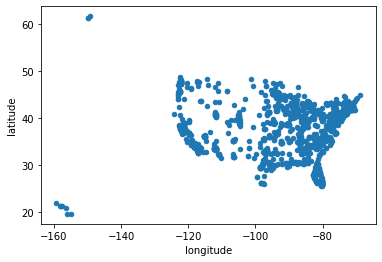

In [ ]:
#Definimos un nuevo conjunto únicamente con la latitud y longitud
latlong=df[["latitude","longitude"]]

#Observamos una primer distribución de los datos
latlong.plot.scatter("longitude","latitude")

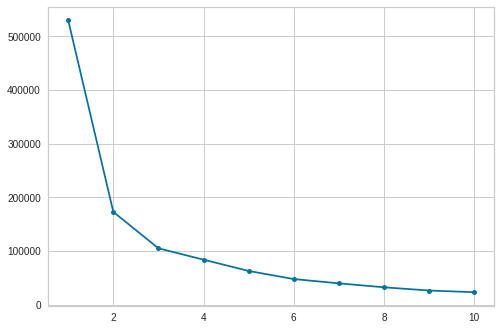

In [ ]:
#Se grafican las inercias de cada cluster con el objetivo de encontrar el "codo" para seleccionar el número adecuado de clusters
clusters = range(1,11)
inercias = []
for i in clusters:
  km = KMeans(n_clusters = i)
  km.fit(latlong)
  inercias.append(km.inertia_)
          
plt.plot(clusters, inercias, "bo-", markersize=5)

Con la gráfia mostrada parecería que el "codo" se forma entre los valores 2 y 3, para tener una mayor certeza sobre el valor óptimo, se pueden obtener los valores de algunas métricas adicionales.

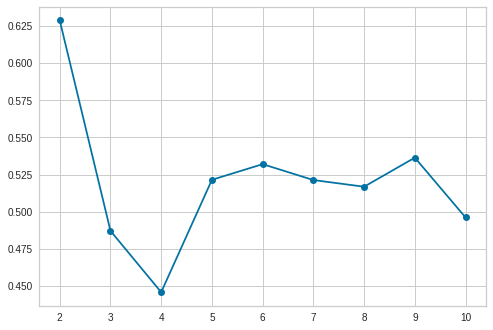

In [ ]:
# silhouette_score nos ayuda para medir que tan poblados y bien separados están los clusters 
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k)
    cl_sil.fit(latlong)
    lst_silhouette.append(silhouette_score(latlong,cl_sil.predict(latlong)))

plt.plot(range(2,11),lst_silhouette,marker='o')

El indicador silhouette_score muestra que el valor óptimo de cluster es 2.

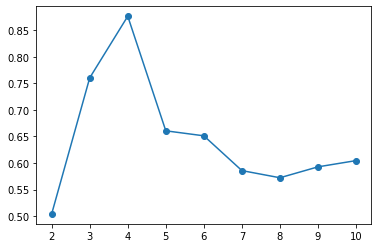

In [ ]:
# el índice Davies-Bouldin es una métricaque muestra la relación entre la dispersión del clúster y la separación del clúster, entre más bajo sea su valor el agrupamiento es mejor.
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(latlong)
    lst_dbscore.append(davies_bouldin_score(latlong,cl_db.predict(latlong)))

plt.plot(range(2,11),lst_dbscore,marker='o')

Con el índice Davies-Bouldin se confirma que el número óptimo de clusters es 2.

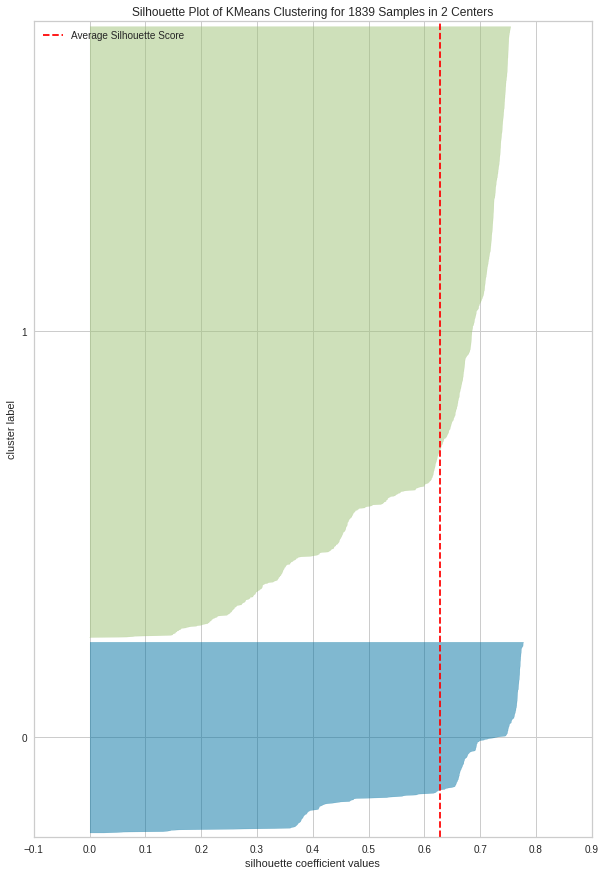

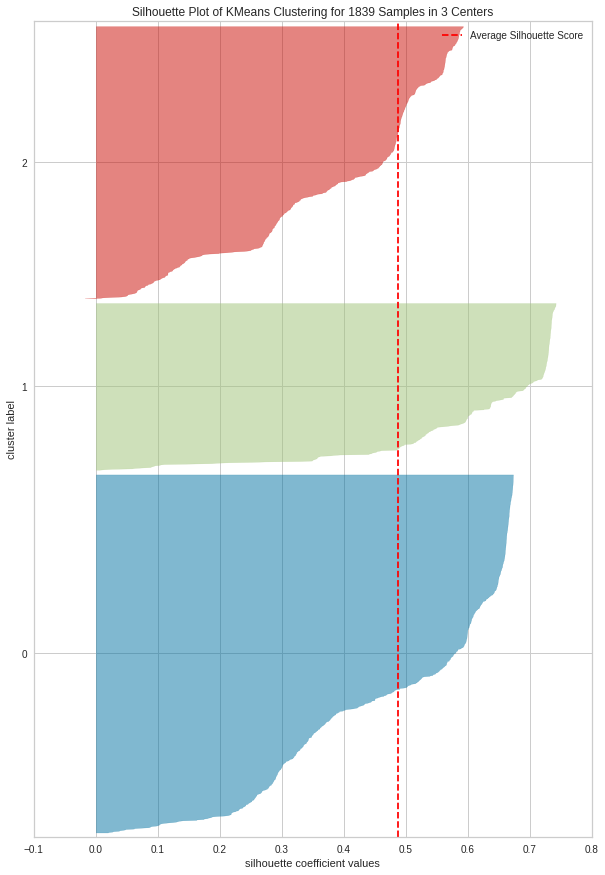

In [ ]:
#Finalmente podemos graficar solo los clusters candidatos y verificar el valor individual de silhouette_score
for j,i in enumerate([2, 3]):
    fig, ax = plt.subplots(figsize=(10,15))
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    visualizer = SilhouetteVisualizer(km,ax=ax, colors='yellowbrick',)
    
    visualizer.fit(latlong)
    visualizer.show()

En estás gráficas se observa que el valor de silhouette_score para cada uno de los cluster es mayor cuando utilizamos 2 clusters.

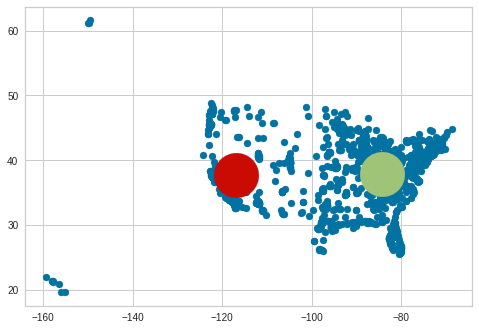

[[  37.81430972  -84.19813796    1.17915774]
 [  37.71744103 -116.90018712    0.87899543]]


In [ ]:
#Para saber en donde estarán úbicados los almacenes podemos obtener los centros de cada cluster
km = KMeans(n_clusters = 2)
km = km.fit(latlong)

centros = km.cluster_centers_

plt.scatter (latlong.longitude, latlong.latitude)

for i in range(0,2):
		plt.scatter(centros[i][1],  centros[i][0], label = i, s = 2000)
  
#plt.legend(loc = "upper left")
plt.show()

print(km.cluster_centers_)

In [ ]:
latlong['kmean'] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


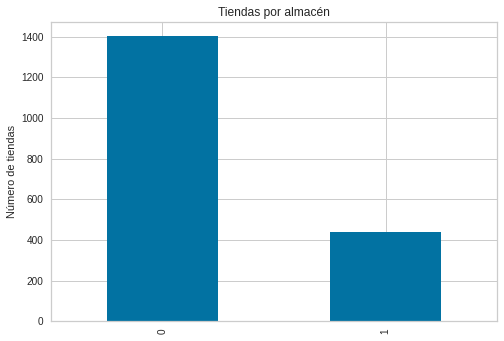

In [ ]:
#Para saber a cuantas tiendas va a atender cada almacen simplemente contamos y podemos verlo de manera gráfica
plt.title("Tiendas por almacén")
plt.ylabel('Número de tiendas')
latlong['kmean'].value_counts().plot(kind='bar')

plt.show()


Finalmente, al ser latitudes y longitudes es mejor obtener una representación visual con un mapa de las locaciones.

In [ ]:
#Se transforma nuestro dataframe en coordenadas
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df['cluster'] = km.labels_

gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates,kmean,cluster
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),0,0
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),0,0
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),0,0
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),0,0
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),0,0


In [ ]:
#Obtenemos el mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


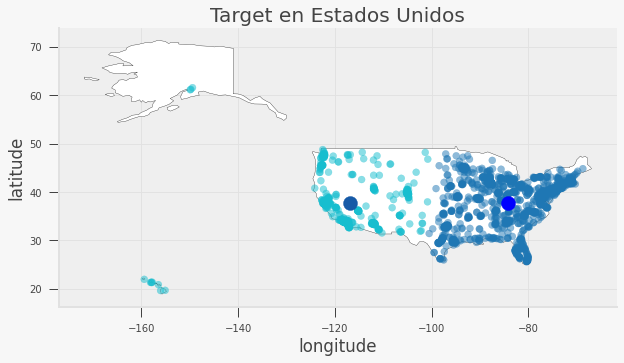

In [ ]:
#Se genera el gráfico
fig, gax = plt.subplots(figsize=(10,10))

#obtenemos el mapa y ubicamos a los dos almacenes
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, column="cluster", alpha = 0.5, categorical=True)

plt.scatter(centros[0][1],  centros[0][0], label = 0, s = 200, color='blue')
plt.scatter(centros[1][1],  centros[1][0], label = 1, s = 200)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

- ¿qué librerías nos pueden ayudar a graficar este tipo de datos?

Algunas librerías útiles para gráficar este tipo de datos son GeoPy, GeoPandas, PyQGIS, Folium y también Cartopy, aunque algunas de estas no son tan fáciles de utilizar.

- ¿Consideras importante que se grafique en un mapa?, ¿por qué?

En este tipo de análisis es fundamental con la mayor cantidad de recursos visuales posibles, ya que el objetivo casi siempre será entregar un reporte y si a los tomadores de decisiones les damos tablas o datos que solo contengan la ciudad o ubicación de los almacenes como en este ejemplo, puede ser que con su expertiz les baste y se den una idea clara de si tiene o no sentido lo que les estamos mostrando, pero los recursos visuales, utilizados de buena forma, siempre facilita que el mensaje que se quiere dar sea recibido correctamente.

- Agrega las conclusiones

Utilizando diferentes métricas se llegó a la conclusión que el número óptimo de almacenes con los que Target debe contar es 2. Para mostrar los resultados se presentó un gráfico en donde se mostraba la potencial ubicación de cada uno de los dos almacenes así como las tiendas que están a su alrededor. Cabe mencionar que la elección de 2 cluster está basada únicamente en el análisis técnico, había posibilidad de aumentar el número de clusters y con ello obviamente algunas tiendas estarían más cerca de alguno de estos nuevos centros, lo que disminuiría el costo y tiempo de traslados, sin embargo, se desconoce el costo asociado a cada uno de los almacenes por lo que, con la información dada, no es posible saber si al aumentar el número de almacenes realmente se disminuirían los costos.